In [18]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image


In [6]:
gb = pd.read_csv('online_gaming_behavior_dataset.csv')

In [7]:
gb = gb[(gb['EngagementLevel']=='High')|(gb['EngagementLevel']=='Low')]
gb = pd.get_dummies(gb, dtype = float)
gb = gb.drop(['PlayerID', 'PlayTimeHours', 'Gender_Male', 'GameGenre_Strategy', 'GameDifficulty_Easy', 'EngagementLevel_Low'], axis=1)
gb

,Age,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender_Female,Location_Asia,Location_Europe,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameDifficulty_Hard,GameDifficulty_Medium,EngagementLevel_High
2,22,0,16,142,35,41,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,37,0,2,81,74,22,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,25,0,1,50,13,2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,38,0,13,95,99,36,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10,17,0,8,95,14,12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40026,33,1,12,166,44,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
40027,17,0,6,24,52,17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
40028,36,0,4,34,97,21,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
40030,44,0,19,114,71,27,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [8]:
# Split the data into features (X) and target (y)
X = gb.drop('EngagementLevel_High', axis=1)
y = gb['EngagementLevel_High']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
y_pred = rf.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9332042594385286


In [32]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.93621103117506


In [13]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.9435998038254046


In [19]:
f1 = f1_score(y_test, y_pred)
print("f1-score:", f1)

f1-score: 0.933074684772066


In [41]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020EF08BC850>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020EF2BA5AF0>})

In [42]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 19, 'n_estimators': 428}


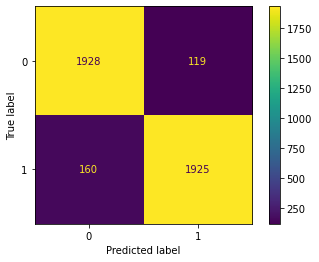

In [30]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_test, y_test)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9344143272023233
Precision: 0.9339712918660287
Recall: 0.93621103117506


In [ ]:
rf_best_params = RandomForestClassifier(max_depth=5, n_estimators=5)
rf_best_params.fit(X_train, y_train)

In [47]:
y_pred_best_params = rf_best_params.predict(X_test)

In [48]:
recall = recall_score(y_test, y_pred_best_params)
print("Recall:", recall)

Recall: 0.9213429256594724


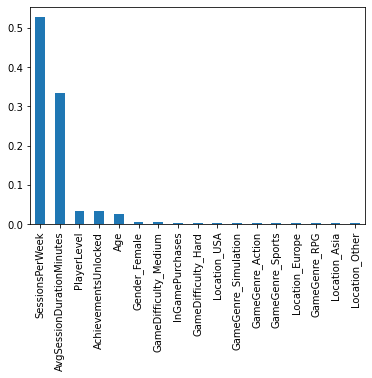

In [28]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();